In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import matplotlib.pyplot as plt 
import numpy as np
import pynbody


s=pynbody.load('/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/1024/WMAP3.CLUES.HR.001024')
h = s.halos()

In [7]:
h1 = h[1]
h1.star.all_keys()
#iord son los ID
# h1.star['tfrom']

['nefe',
 'hetot',
 'mjeans',
 'ofe',
 'ljeans',
 'ne',
 'feh',
 'c_s',
 'mgfe',
 'oxh',
 'HeIII',
 'sife',
 'mjeans_turb',
 'HII',
 'ljeans_turb',
 'hydrogen',
 'c_s_turb',
 'r_mag',
 'i_mag',
 'K_lum_den',
 'vtheta',
 'U_lum_den',
 'vcxy',
 'j2',
 'I_lum_den',
 'u_mag',
 'cs',
 'vr',
 'vt',
 'H_lum_den',
 'V_lum_den',
 'alt',
 'i_lum_den',
 'u',
 'mu',
 'az',
 'I_mag',
 'vrxy',
 'u_lum_den',
 'J_lum_den',
 'k_mag',
 'v_mag',
 'U_mag',
 'v_mean',
 'h_lum_den',
 'v_lum_den',
 'theta',
 'b_mag',
 'zeldovich_offset',
 'j_mag',
 'B_lum_den',
 'jz',
 'j_lum_den',
 'K_mag',
 'V_mag',
 'v2',
 'J_mag',
 'rho',
 'H_mag',
 'h_mag',
 'B_mag',
 'aform',
 'k_lum_den',
 'te',
 'b_lum_den',
 'temp',
 'ke',
 'age',
 'j',
 'smooth',
 'rxy',
 'p',
 'r',
 'R_lum_den',
 'vphi',
 'r_lum_den',
 'R_mag',
 'v_disp',
 'phi',
 'iord',
 'pos',
 'metals',
 'igasorder',
 'HI',
 'coolontime',
 'massform',
 'tform',
 'FeMassFrac',
 'eps',
 'ESNRate',
 'mass',
 'HeII',
 'vel',
 'OxMassFrac',
 'HeI']

### Particulas de la barra a z=0 - M31gs

321404


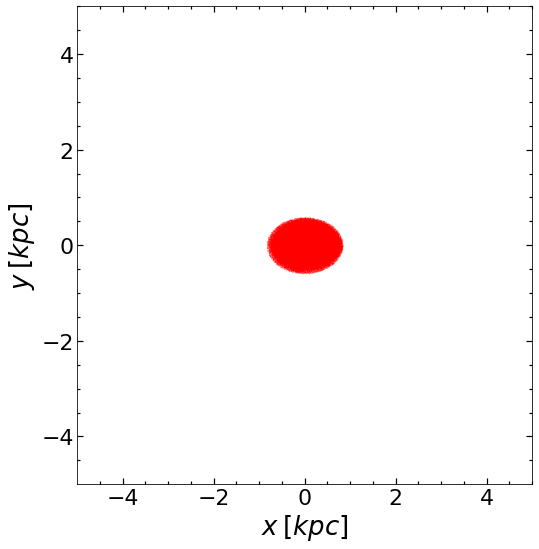

In [19]:
import rotation as rot
import barstrength2 as strng
import tenform as ten
from numpy import linalg

h1 = h[1]

data = np.loadtxt('/z/omarioni/pyprogram/newdata/M31_lbarvstime.dat')
lbar1 = data[:,1]
lbar2 = data[:,2]

time = s.properties['time'].in_units('Gyr')
aexp = s.properties['a']
hh = s.properties['h']
    
r200  = h1.properties['Rvir']
IDs   = h1.star['iord']
tform = h1.star['tform'].in_units('Gyr')

cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True).in_units('kpc')

#print '---------------------------------------------'
#print 'halo', '%s'%vector[i]

xstr=((h1.star['pos'].in_units('kpc'))[:,0] - cen_pot[0])
ystr=((h1.star['pos'].in_units('kpc'))[:,1] - cen_pot[1])
zstr=((h1.star['pos'].in_units('kpc'))[:,2] - cen_pot[2])
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)    

mstr = h1.star['mass'].in_units('Msol')

vel=(h1.star['vel'].in_units('km s**-1'))

rgal = 0.15*r200          #defino el radio de la galaxia

limit = np.where(rstr<rgal)         #hago un límite de los r dentro de rgal
r_sort = np.sort(rstr[limit])       #acomodo los r de menor a mayor
r_indice = np.argsort(rstr[limit])  #saco los argumentos de r acomodados de menor a mayor

Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
razon = Mc_str/Mgal 
noventa, = np.where(razon < 0.9)
cincuenta, = np.where(razon < 0.5)

r90 = r_sort[noventa][-1]   #radio a 90% la masa
r50 = r_sort[cincuenta][-1] #radio a 50% la masa

#-----------------------------------------------------------------------

#componentes de la velocidad del centro de masa
veloc, = np.where(rstr < r50)

vxcm = sum(mstr[veloc]*vel[:,0][veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*vel[:,1][veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*vel[:,2][veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
vx = vel[:,0] - vxcm
vy = vel[:,1] - vycm
vz = vel[:,2] - vzcm

#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp)

xn = e1x*xstr + e1y*ystr + e1z*zstr
yn = e2x*xstr + e2y*ystr + e2z*zstr
zn = e3x*xstr + e3y*ystr + e3z*zstr
vxn = e1x*vx + e1y*vy + e1z*vz
vyn = e2x*vx + e2y*vy + e2z*vz
vzn = e3x*vx + e3y*vy + e3z*vz

rn  = np.sqrt(xn**2 + yn**2 + zn**2)

#--------------------------------------------------------------------------------------    

corte, = np.where(rstr<3*aexp)

A2max, rmax, phimax = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)

#     print phi, lbar2[i]

xx = xn*cos(phimax)+yn*sin(phimax)
yy = xn*-sin(phimax)+yn*cos(phimax)
zz = zn

#----para lbar2--------------------------------------------------------------
limit1,=np.where(rstr < lbar2[0])
tensor = ten.tenf(xx[limit1], yy[limit1], zz[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

A1 = np.sqrt(a1)
B1 = np.sqrt(b1)
C1 = np.sqrt(c1)


#Definimos el tamaño de nuestro elipsoide
aa=lbar2[0]
bb=(B1/A1)*lbar2[0]
cc=(C1/A1)*lbar2[0]

#Hacemos la rotación de las coordenadas

RR = np.sqrt((xx/aa)**2+(yy/bb)**2+(zz/cc)**2) # formula del elipsoide

mask, = np.where(RR<1) #seleccionamos las particulas dentro del elipsoide

ID    = IDs[mask]
tform = tform[mask]
rn_z0 = rn[mask]

print len(ID)


#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
# datos = np.ndarray([len(ID),3])
# datos[:,0] = ID
# datos[:,1] = tform
# datos[:,2] = rn_z0

# np.savetxt('/z/omarioni/pyprogram/newdata/part_barra.dat', datos, fmt=('%15d' '%12.6f' '%12.6f'))

#----------------------------------------------------------------------------------  

# fig=plt.figure(1, figsize=(8,8))
# fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
# ax=fig.add_subplot(111)
# #     ax.plot(xn,yn,'.', markersize=0.1, color='k')
# ax.plot(xn[mask],yn[mask],'.', markersize=0.1, color='r')
# ax.set_xlim(-5,5)
# ax.set_ylim(-5,5)
# ax.minorticks_on()
# ax.tick_params( labelsize=22)
# ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
# ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')  
# ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
# ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# plt.show()

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pynbody

snapshot = np.loadtxt('/z/omarioni/snapshots.txt', dtype='string') #SNAPSHOTS
isnap = snapshot[::-1]

afile = np.loadtxt('/z/omarioni/pyprogram/newdata/M31_masscenter_time.dat')
time = afile[:,0]
xcm =  afile[:,1]
ycm =  afile[:,2]
zcm =  afile[:,3]

xfile = np.loadtxt('/z/omarioni/pyprogram/newdata/part_barra.dat')
ID    = xfile[:,0]
tform = xfile[:,1]
rn_z0 = xfile[:,2]


path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'

kk = range(0,len(ID), 100)
for i in range(1200,len(ID)):
    if i in kk:
        print i
    for j in range(0,len(time)-1):
        
        if ((time[j] > tform[i]) & (time[j+1] < tform[i])):
#             print 'tiempo',time[j]
#             print 'tform', tform[i]
#             print 'snap', isnap[j]
        
            s=pynbody.load(path + str('%s'%isnap[j]) + '/WMAP3.CLUES.HR.00' + str('%s'%isnap[j]))
            
            IDs = s.star['iord']
            
            xstr= (s.star['pos'].in_units('kpc'))[:,0] - xcm[j] 
            ystr= (s.star['pos'].in_units('kpc'))[:,1] - ycm[j]
            zstr= (s.star['pos'].in_units('kpc'))[:,2] - zcm[j]
            rstr = np.sqrt(xstr**2+ystr**2+zstr**2)    
                                        
            mask3, = np.where(IDs == ID[i])
            
            print i, ID[i]
#             print 'ID', ID[i]
#             print 'rn', rstr[mask3]
#             print 'tform', tform[i]
#             print 'rn_z0', rn_z0[i]
        
#-----------------------------------------------------------------------------
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
#             archivo1 =  open('/z/omarioni/pyprogram/newdata/tform_barra.dat','a')
#             archivo1.write(str('%15d'% ID[i]) +'\t'+
#                        str('%12.6f'% tform[i]) +'\t'+
#                        str('%12.6f'% rn_z0[i]) +'\t'+
#                        str('%12.6f'% rstr[mask3]) +'\n')
#             archivo1.close()

            


1200
1225 117975346.0
1226 117976085.0
1227 117976124.0
1228 117976134.0
1229 117976145.0


KeyboardInterrupt: 

In [4]:
afile = np.loadtxt('/z/omarioni/pyprogram/newdata/M31_masscenter_time.dat')
time = afile[:,0]
xcm =  afile[:,1]
ycm =  afile[:,2]
zcm =  afile[:,3]

print time 


[13.72956552 13.51532163 13.30107774 13.08683386 12.87258997 12.65834608
 12.44410219 12.2298583  12.01561442 11.80137053 11.58712664 11.37288275
 11.15863887 10.94439498 10.73015109 10.5159072  10.30166331 10.08741943
  9.87317554  9.65893165  9.44468776  9.23044387  9.01619999  8.8019561
  8.58771221  8.37346832  8.15922443  7.94498055  7.73073666  7.51649277
  7.30224888  7.088005    6.87376111  6.65951722  6.44527333  6.23102944
  6.08373677  6.01678556  5.80254167  5.58829778  5.37405389  5.15981
  4.94556612  4.73132223  4.51707834  4.30283445  4.08859056  3.87434668
  3.66010279  3.4458589   3.23161501  3.01737113  2.80312724  2.58888335
  2.37463946  2.16039557  1.94615169  1.7319078   1.51766391]


## tform M31-gs

In [47]:
import matplotlib.pyplot as plt 
import numpy as np
import pynbody

snapshot = np.loadtxt('/z/omarioni/snapshots.txt', dtype='string') #SNAPSHOTS
isnap = snapshot[::-1]

afile = np.loadtxt('/z/omarioni/pyprogram/newdata/M31_masscenter_time.dat')
time = afile[:,0]
xcm =  afile[:,1]
ycm =  afile[:,2]
zcm =  afile[:,3]

xfile = np.loadtxt('/z/omarioni/pyprogram/newdata/part_barra.dat')
ID    = xfile[:,0]
tform = xfile[:,1]
rn_z0 = xfile[:,2]

tform_sort = np.argsort(tform)
tform = tform[tform_sort][::-1]
rn_z0 = rn_z0[tform_sort][::-1]
ID    = ID[tform_sort][::-1]


path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'

# print tform[:20], time


archivo1 =  open('/z/omarioni/pyprogram/newdata/tform_barra.dat','a')

q = 0
m = 0
for j in range(0,len(time)-1):
    k =0
    for i in range(q,len(ID)): 
        
        if ((tform[i]<time[j]) & (tform[i]>time[j+1])):
            k += 1
        elif tform[i]<time[j+1]:
            q = i
#             m +=k
            print 'q=',q
#             print 'k=',k , m
            break
        
        
        
    s=pynbody.load(path + str('%s'%isnap[j]) + '/WMAP3.CLUES.HR.00' + str('%s'%isnap[j]))

    IDs = s.star['iord']

    xstr= (s.star['pos'].in_units('kpc'))[:,0] - xcm[j] 
    ystr= (s.star['pos'].in_units('kpc'))[:,1] - ycm[j]
    zstr= (s.star['pos'].in_units('kpc'))[:,2] - zcm[j]
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)    
                                        
    mask3 = np.in1d(IDs, ID[i-k:i])
            
#             print i, ID[i]
#             print 'ID', ID[i]
#             print 'rn', rstr[mask3]
#             print 'tform', tform[i]
#             print 'rn_z0', rn_z0[i]
        
#-----------------------------------------------------------------------------
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
    data = np.ndarray([len(rstr[mask3]),4])
    data[:,0]= ID[i-k:i]
    data[:,1]= tform[i-k:i]
    data[:,2]= rn_z0[i-k:i]
    data[:,3]= rstr[mask3]
    np.savetxt(archivo1, data)
    
    print '---'
archivo1.close()

            

q= 5198
---
q= 12497
---
q= 17260
---
q= 24539
---
q= 31632
---
q= 38334
---
q= 46287
---
q= 54562
---
q= 61673
---
q= 69796
---
q= 78851
---
q= 86419
---
q= 93353
---
q= 99610
---
q= 106066
---
q= 111012
---
q= 119603
---
q= 125157
---
q= 135793
---
q= 146039
---
q= 155321
---
q= 163646
---
q= 177222
---
q= 191025
---
q= 204028
---
q= 219486
---
q= 237304
---
q= 262776
---
q= 275111
---
q= 286818
---
q= 296310
---
q= 297741
---
q= 300026
---
q= 301538
---
q= 302782
---
q= 304327
---
q= 304672
---
q= 305825
---
q= 306582
---
q= 307056
---
q= 308022
---
q= 308504
---
q= 309455
---
q= 309618
---
q= 309644
---
q= 310267
---
q= 310623
---
q= 311762
---
q= 312644
---
q= 314447
---
q= 315074
---
q= 316032
---
q= 316528
---
q= 317194
---
q= 317988
---
q= 318705
---
q= 319287
---
q= 320179
---


In [40]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
y = np.array([2,4,6,8,10,15,17,19])

mask, = np.where(x == y[0])

x[mask]

array([2])

In [45]:
zz,=np.in1d(x,y[0:5])
print zz
x[zz]

ValueError: too many values to unpack

### Particulas de la barra a z=0 - MWgs

In [52]:
import rotation as rot
import barstrength2 as strng
import tenform as ten
from numpy import linalg
import matplotlib.pyplot as plt 
import numpy as np
import pynbody


s=pynbody.load('/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/1024/WMAP3.CLUES.HR.001024')
h = s.halos()

h1 = h[2]

data = np.loadtxt('/z/omarioni/pyprogram/newdata/MW_lbarvstime.dat')
lbar1 = data[:,1]
lbar2 = data[:,2]

time = s.properties['time'].in_units('Gyr')
aexp = s.properties['a']
hh = s.properties['h']
    
r200  = h1.properties['Rvir']
IDs   = h1.star['iord']
tform = h1.star['tform'].in_units('Gyr')

cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True).in_units('kpc')

#print '---------------------------------------------'
#print 'halo', '%s'%vector[i]

xstr=((h1.star['pos'].in_units('kpc'))[:,0] - cen_pot[0])
ystr=((h1.star['pos'].in_units('kpc'))[:,1] - cen_pot[1])
zstr=((h1.star['pos'].in_units('kpc'))[:,2] - cen_pot[2])
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)    

mstr = h1.star['mass'].in_units('Msol')

vel=(h1.star['vel'].in_units('km s**-1'))

rgal = 0.15*r200          #defino el radio de la galaxia

limit = np.where(rstr<rgal)         #hago un límite de los r dentro de rgal
r_sort = np.sort(rstr[limit])       #acomodo los r de menor a mayor
r_indice = np.argsort(rstr[limit])  #saco los argumentos de r acomodados de menor a mayor

Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
razon = Mc_str/Mgal 
noventa, = np.where(razon < 0.9)
cincuenta, = np.where(razon < 0.5)

r90 = r_sort[noventa][-1]   #radio a 90% la masa
r50 = r_sort[cincuenta][-1] #radio a 50% la masa

#-----------------------------------------------------------------------

#componentes de la velocidad del centro de masa
veloc, = np.where(rstr < r50)

vxcm = sum(mstr[veloc]*vel[:,0][veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*vel[:,1][veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*vel[:,2][veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
vx = vel[:,0] - vxcm
vy = vel[:,1] - vycm
vz = vel[:,2] - vzcm

#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp)

xn = e1x*xstr + e1y*ystr + e1z*zstr
yn = e2x*xstr + e2y*ystr + e2z*zstr
zn = e3x*xstr + e3y*ystr + e3z*zstr
vxn = e1x*vx + e1y*vy + e1z*vz
vyn = e2x*vx + e2y*vy + e2z*vz
vzn = e3x*vx + e3y*vy + e3z*vz

rn  = np.sqrt(xn**2 + yn**2 + zn**2)

#--------------------------------------------------------------------------------------    

corte, = np.where(rstr<3*aexp)

A2max, rmax, phimax = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)

#     print phi, lbar2[i]

xx = xn*cos(phimax)+yn*sin(phimax)
yy = xn*-sin(phimax)+yn*cos(phimax)
zz = zn

#----para lbar2--------------------------------------------------------------
limit1,=np.where(rstr < lbar2[0])
tensor = ten.tenf(xx[limit1], yy[limit1], zz[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

A1 = np.sqrt(a1)
B1 = np.sqrt(b1)
C1 = np.sqrt(c1)


#Definimos el tamaño de nuestro elipsoide
aa=lbar2[0]
bb=(B1/A1)*lbar2[0]
cc=(C1/A1)*lbar2[0]

#Hacemos la rotación de las coordenadas

RR = np.sqrt((xx/aa)**2+(yy/bb)**2+(zz/cc)**2) # formula del elipsoide

mask, = np.where(RR<1) #seleccionamos las particulas dentro del elipsoide

ID    = IDs[mask]
tform = tform[mask]
rn_z0 = rn[mask]

print len(ID)


#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
datos = np.ndarray([len(ID),3])
datos[:,0] = ID
datos[:,1] = tform
datos[:,2] = rn_z0

np.savetxt('/z/omarioni/pyprogram/newdata/part_barra_MW.dat', datos, fmt=('%15d' '%12.6f' '%12.6f'))

#----------------------------------------------------------------------------------  

# fig=plt.figure(1, figsize=(8,8))
# fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
# ax=fig.add_subplot(111)
# #     ax.plot(xn,yn,'.', markersize=0.1, color='k')
# ax.plot(xn[mask],yn[mask],'.', markersize=0.1, color='r')
# ax.set_xlim(-5,5)
# ax.set_ylim(-5,5)
# ax.minorticks_on()
# ax.tick_params( labelsize=22)
# ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
# ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')  
# ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
# ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# plt.show()

217198


## tform MW -gs

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pynbody

snapshot = np.loadtxt('/z/omarioni/snapshots.txt', dtype='string') #SNAPSHOTS
isnap = snapshot[::-1]

afile = np.loadtxt('/z/omarioni/pyprogram/newdata/MW_masscenter_time.dat')
time = afile[:,0]
xcm =  afile[:,1]
ycm =  afile[:,2]
zcm =  afile[:,3]

xfile = np.loadtxt('/z/omarioni/pyprogram/newdata/part_barra_MW.dat')
ID    = xfile[:,0]
tform = xfile[:,1]
rn_z0 = xfile[:,2]

tform_sort = np.argsort(tform)
tform = tform[tform_sort][::-1]
rn_z0 = rn_z0[tform_sort][::-1]
ID    = ID[tform_sort][::-1]


path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'

# print tform[:20], time


archivo1 =  open('/z/omarioni/pyprogram/newdata/tform_barra_MW.dat','a')

q = 0
m = 0
for j in range(0,len(time)-1):
    k =0
    for i in range(q,len(ID)): 
        
        if ((tform[i]<time[j]) & (tform[i]>time[j+1])):
            k += 1
        elif tform[i]<time[j+1]:
            q = i
#             m +=k
            print 'q=',q
#             print 'k=',k , m
            break
        
        
        
    s=pynbody.load(path + str('%s'%isnap[j]) + '/WMAP3.CLUES.HR.00' + str('%s'%isnap[j]))

    IDs = s.star['iord']

    xstr= (s.star['pos'].in_units('kpc'))[:,0] - xcm[j] 
    ystr= (s.star['pos'].in_units('kpc'))[:,1] - ycm[j]
    zstr= (s.star['pos'].in_units('kpc'))[:,2] - zcm[j]
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)    
                                        
    mask3 = np.in1d(IDs, ID[i-k:i])
            
#             print i, ID[i]
#             print 'ID', ID[i]
#             print 'rn', rstr[mask3]
#             print 'tform', tform[i]
#             print 'rn_z0', rn_z0[i]
        
#-----------------------------------------------------------------------------
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
    data = np.ndarray([len(rstr[mask3]),4])
    data[:,0]= ID[i-k:i]
    data[:,1]= tform[i-k:i]
    data[:,2]= rn_z0[i-k:i]
    data[:,3]= rstr[mask3]
    np.savetxt(archivo1, data)
    
    print '---'
archivo1.close()


q= 579
---
q= 1301
---
q= 1839
---
q= 2457
---
q= 3808
---
q= 5117
---
q= 7124
---
q= 9850
---
q= 11074
---
q= 17511
---
q= 30012
---
q= 38051
---
q= 44020
---
q= 50199
---
q= 57566
---
q= 69355
---
q= 82979
---
q= 96428
---
q= 104083
---
q= 109649
---
q= 120587
---
q= 131155
---
q= 139466
---
q= 146235
---
q= 149041
---
q= 153184
---
q= 158422
---
q= 160845
---
q= 162555
---
q= 166111
---
q= 167398
---
q= 169536
---
q= 169907
---
q= 170049
---
q= 170230
---
q= 170786
---
q= 171063
---
q= 173152
---
q= 178341
